### Procesy transportu w środowisku
sem. letni 2025
Właściwa kolejność planowania (fizyczny, matem, numeryczny, symul)

Krytyczne spojrzenie na wyniki eksperymentu.
- zwrócenie uwagi na metody numeryczne i porównanie z wynikami analitycznymi - zaznaczenie różnych rozbieżności (to nie jest rozwiązanie analityczne)
- na przykładzie eksponenty

##### Model matematyczny 
Równanie różniczkowe:  $$\frac{dx(t)}{dt} = \lambda x(t)$$

Rozwiązanie analityczne: $$x(t) = x(0)e^{\lambda t}$$

##### Model numeryczny 
Schemat różnicowy: $$\frac{dx(t)}{dt} \approx \frac{\Delta x}{\Delta t} = \frac{x(t+h) - x(t)}{h} = \lambda x(t)$$
$$x(t + h) = h\lambda x(t) + x(t) = x(t) (h\lambda +1)$$

Model numeryczny: $$x(t) = \Sigma_{n=0}^{N}  \frac{x(t_{n+1}) - x(t_n)}{h} = \Sigma_{n=0}^{N} \lambda x(t_n) $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot
import pint

In [2]:
si = pint.UnitRegistry()

In [3]:
N = 100
t = np.linspace(0, 20, N+1)* si.s
h = t[1]-t[0]
x = np.zeros(N+1)*si.m
print(h)

0.2 second


In [4]:
l = -0.5 / si.s
x[0] = 1 * si.m
print(l*h)

-0.1 dimensionless


In [5]:
x_analytic = x[0]* np.exp(l * t)

In [6]:
for n in range(0, N):
    x[n+1] = x[n]*(l*h+1) 


/opt/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


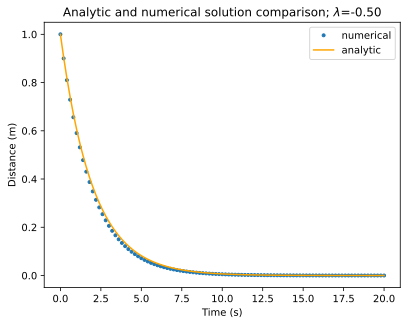

In [7]:
plt.plot(t, x , '.', label='numerical')
plt.plot(t, x_analytic , color='orange', label='analytic')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title(f"Analytic and numerical solution comparison; $\\lambda$={l.magnitude:.2f}")
show_plot("exponent.pdf")